# Probabilistic Machine Learning
<div style="text-align: right"> University of Tübingen, Summer Term 2023  &copy; 2023 P. Hennig </div>

## Exercise Sheet No. 4 — Gaussians

---

Submission by:
* FirstName1, Surname1, Matrikelnummer: MatrikelnummerOfFirstTeamMember
* FirstName2, Surname2, Matrikelnummer: MatrikelnummerOfSecondTeamMember

In [6]:
import jax.numpy as jnp
from jax import random
key = random.PRNGKey(0)
from exponential_families import *
from tueplots import bundles
from matplotlib import pyplot as plt
plt.rcParams.update(bundles.beamer_moml())
plt.rcParams.update({'figure.dpi': 200})

## Exercise 4.2 (Coding Exercise)

> This week's Exercise is directly taken from Exercise 24.3. of [David JC MacKay](https://en.wikipedia.org/wiki/David_J._C._MacKay)'s [*Information Theory, Inference, and Learning Algorithms*](http://www.inference.org.uk/mackay/itila/). (But don't waste your time trying to find an answer there :)

The terribly important quantity $\mu$ has been experimentally measured by seven scientists (A, B, C, D, E, F, G) with wildly differing experimental skills. They have reported the following measurements:

In [7]:
X = jnp.array([-27.020,3.570,8.191,9.898,9.603,9.945,10.056])

Text(0.5, 0, 'measured value of $x$')

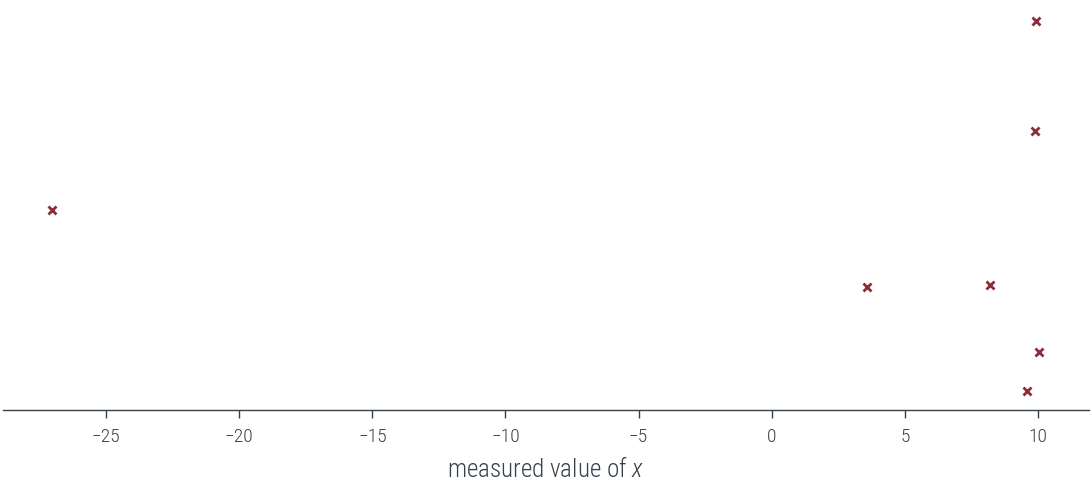

In [8]:
fig,ax = plt.subplots(1,1)
ax.plot(X,random.uniform(key, shape=(7,)),'x',ms=3)

ax.yaxis.set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xlabel('measured value of $x$')

We assume that they have all, independently of each other, made an unbiased Gaussian measurement of $\mu$: 
$$p(\boldsymbol{x}\mid \mu,\boldsymbol{\sigma}) = \prod_{i=1} ^7 \mathcal{N}(x_i;\mu,\sigma_i ^2).$$ 
But we have to assume that their measurement errors $\sigma_i$ vary a lot (some are skilled experimentalists, others are unqualified). 

#### Task A: 
Implement the likelihood above as a single jax function (this is unfortunately a case where our neat `ExponentialFamily` base class is more awkward than useful). Try using a numerical optimizer to find *maximum likelihood estimators*, i.e. points $(\mu, \vec{\sigma})$ that maximize this function. Alternatively, you can try and identify such points directly by inspecting the likelihood by hand.
  
You probably agree that, intuitively, it looks pretty certain that A and B are both inept measurers, that D–G are better, and that the true value of $\mu$ is somewhere close to $10$. Are your findings consistent with this intuition?  

In [4]:
## Your answer here

#### Task B:
We will now instead provide a Bayesian answer. Let the prior on each $\sigma_i^{-2}$ be a broad [Gamma distribution](https://en.wikipedia.org/wiki/Gamma_distribution), i.e. the distribution
$$ \mathcal{G}(z;\alpha,\beta)=\frac{\beta^\alpha}{\Gamma(\alpha)} z^{\alpha-1} e^{-\beta z},$$
and
$$p(\boldsymbol{\sigma}) = \prod_{i=1} ^7 \mathcal{G}(\sigma_i^{-2};\alpha,\beta),$$ 
with, say, $\alpha=1$, $\beta=0.1$. 

Let the prior for $\mu$ be a broad Gaussian $p(\mu) = \mathcal{N}(\mu; m, v^2)$ with mean $m = 0$ and standard deviation $v = 10^3$. 

Find the posterior for $\mu$. Plot this posterior for $\mu$, both for the data given above and for $\boldsymbol{x} = \{13.01, 7.39\}$.


**Hint:** First, remember that the Gamma is the conjugate prior for the Gaussian with fixed mean $\mu$. The marginal $p(\boldsymbol{x}\mid\mu)$ can thus be computed using the `log_marginal_pdf` function you implemented generically for exponential families last week, and which has an analytic form. Then use Bayes' theorem a second time to find $p(\mu\mid\boldsymbol{x})$ up to normalization, by directly multiplying the prior for $\mu$ and the marginal likelihood terms you just found. 


In [5]:
## Your answer here.